In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates

%matplotlib notebook

In [72]:
# df = pd.HDFStore('../Data/intralipid_sweep/analysis.h5')['df']
df = pd.HDFStore('../Data/1469611506.380659/analysis.h5')['df']
# df = pd.HDFStore('../Data/IL_manual_premix/analysis.h5')['df']
# Create column for time since start of measurement
# df['datetime'] = df['datetime'].astype('datetime64[ns]')
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

In [73]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15464 entries, 0 to 15463
Data columns (total 19 columns):
datetime         15464 non-null datetime64[ns]
chip             15464 non-null object
concentration    15464 non-null float64
current          15464 non-null float64
flow_rate        15464 non-null int64
fs               15464 non-null float64
humidity         15464 non-null object
measurementID    15464 non-null float64
medium           15464 non-null object
optical power    15464 non-null object
run_time         15464 non-null int64
sample_no        15464 non-null int64
sweep_no         15464 non-null int64
t_in             15464 non-null object
t_out            15464 non-null object
tempC            15464 non-null object
mean             15464 non-null float64
std              15464 non-null float64
delta            15464 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(6), int64(4), object(7), timedelta64[ns](1)
memory usage: 2.4+ MB


In [64]:
# Get some useful data for plotting later
try:
    flush_time = df['run_time'][0]
    print(flush_time)
except KeyError:
    print('Not valid entry')

5


In [65]:
df.head()
# df.info()

,datetime,chip,concentration,current,flow_rate,fs,humidity,measurementID,medium,optical power,run_time,sample_no,sweep_no,t_in,t_out,tempC,mean,std,delta
0,1.469612e+09,Blank,0.0,0.07,1,0.0001,47.38,1.469612e+09,Intralipid (%),7.48332241E-05\n,5,500,1,24.75,24.50,25.07,1.342782,0.024274,0 days
1,1.469612e+09,Blank,0.0,0.07,1,0.0001,47.38,1.469612e+09,Intralipid (%),1.55421716E-04\n,5,500,2,24.75,24.50,25.07,1.341555,0.061650,0 days
2,1.469612e+09,Blank,0.0,0.07,1,0.0001,47.38,1.469612e+09,Intralipid (%),1.55421716E-04\n,5,500,3,24.75,24.50,25.07,1.342028,0.028701,0 days
3,1.469612e+09,Blank,0.0,0.07,1,0.0001,47.38,1.469612e+09,Intralipid (%),7.48332241E-05\n,5,500,4,24.75,24.50,25.07,1.343604,0.015772,0 days
4,1.469612e+09,Blank,0.0,0.07,1,0.0001,47.38,1.469612e+09,Intralipid (%),-5.75528202E-06\n,5,500,5,24.75,24.50,25.07,1.344227,0.018820,0 days


<IPython.core.display.Javascript object>


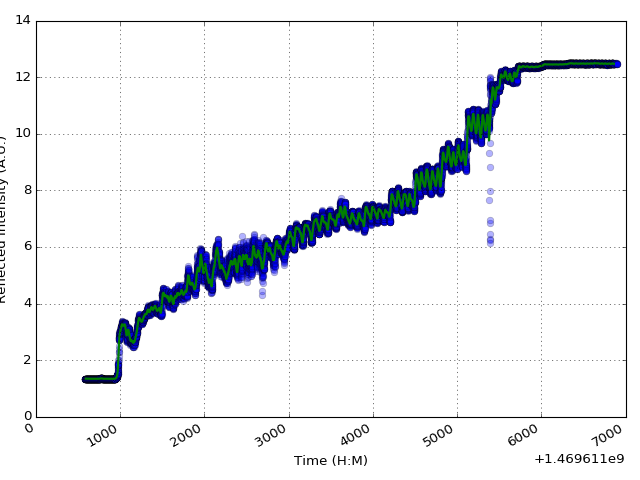

In [66]:
# Create plot of lifetime vs time
fig, ax = plt.subplots()
ax.plot('datetime', 'mean', 'o', alpha=0.3, data=df)
rolling = df['mean'].rolling(window=50, center=True).mean()
ax.plot(df['datetime'], rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

# format the ticks
# ax.xaxis.set_major_locator(mdates.HourLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=np.arange(0, 60, flush_time)))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()  # Rotate slightly

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time (H:M)')
plt.ylabel('Reflected intensity (A.U.)')
# plt.savefig("../Data/" + str(timestamp) + '/lifetimeVsTime.png', dpi=500)

# Drop Sweeps

In [74]:
# Drop first 600 sweeps (300 sweeps = 1 min @ 5HZ capture rate)
df = df[df.sweep_no > 500]
# df = df[df.sweep_no < 900]

In [75]:
plt.close("all")

In [76]:
grouped = df.groupby(['concentration'])

<IPython.core.display.Javascript object>


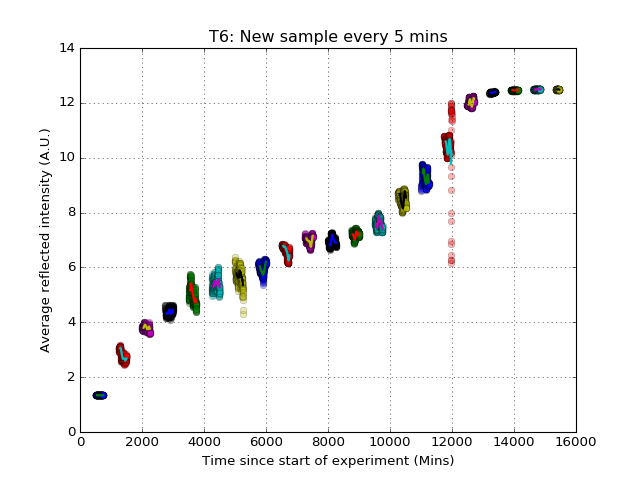

In [77]:
#
#   QUICK FIX
#
# All in one
fig, ax = plt.subplots()

for key, group in grouped:
    ax.plot(group['mean'], 'o', alpha=0.3, label=key)
    rolling = group['mean'].rolling(window=50).mean()
    ax.plot( rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
# plt.xticks(np.arange(0, max(group['delta'])+flush_time, flush_time))
# fig.autofmt_xdate()  # Rotate slightly

# plt.legend(loc='best', ncol=3, fontsize='small')\
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Average reflected intensity (A.U.)')
plt.title('T6: New sample every {:d} mins'.format(flush_time))
# plt.savefig('../Data/Plots/' + 'lifetimeVsTime.png', dpi=500)

<IPython.core.display.Javascript object>


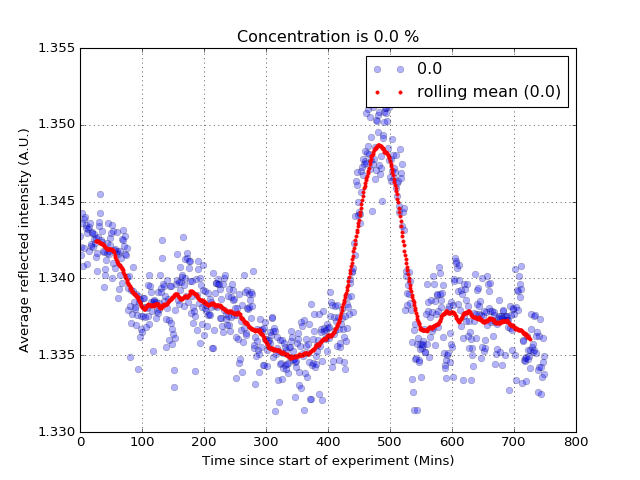

<IPython.core.display.Javascript object>


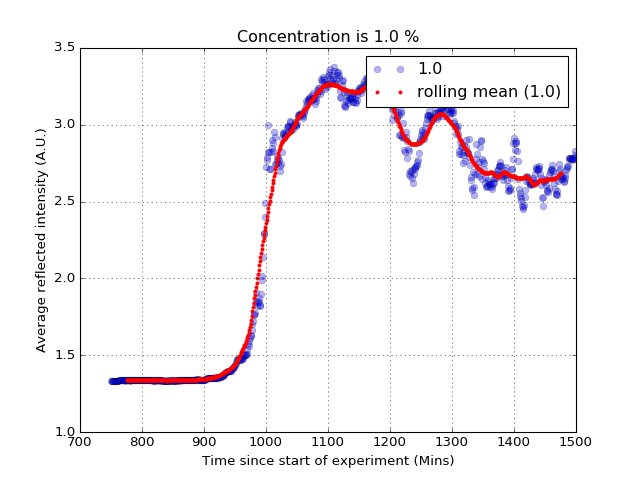

<IPython.core.display.Javascript object>


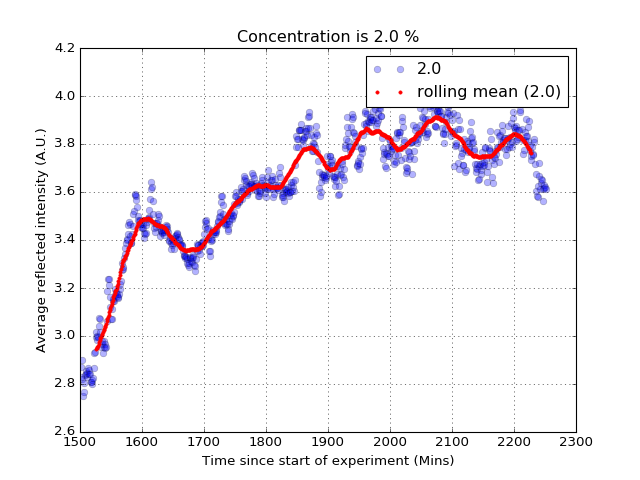

<IPython.core.display.Javascript object>


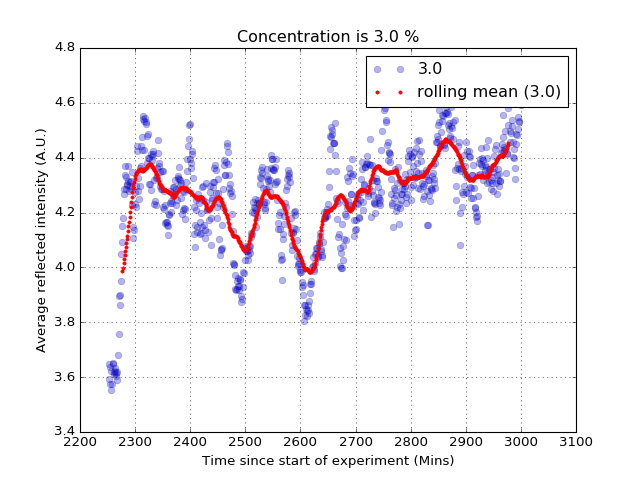

<IPython.core.display.Javascript object>


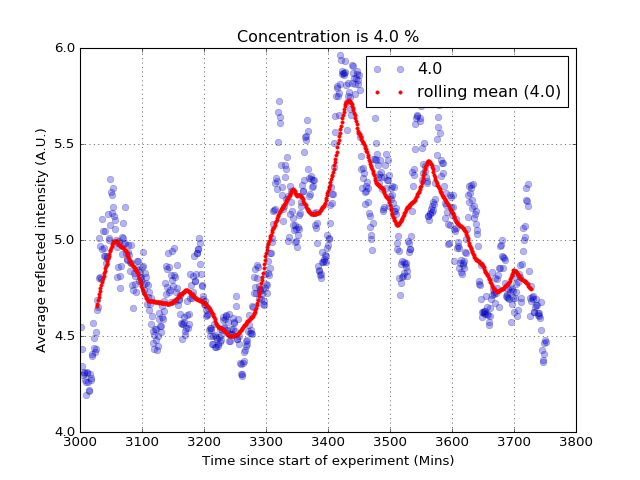

<IPython.core.display.Javascript object>


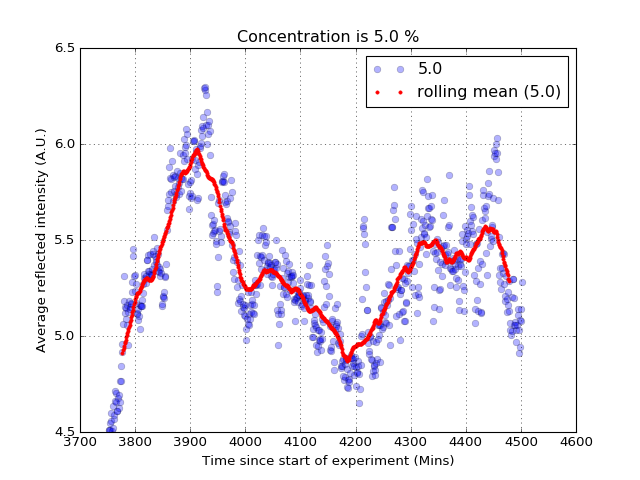

<IPython.core.display.Javascript object>


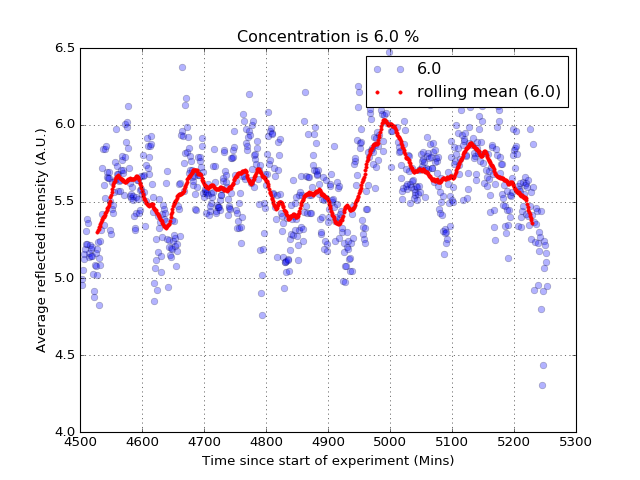

<IPython.core.display.Javascript object>


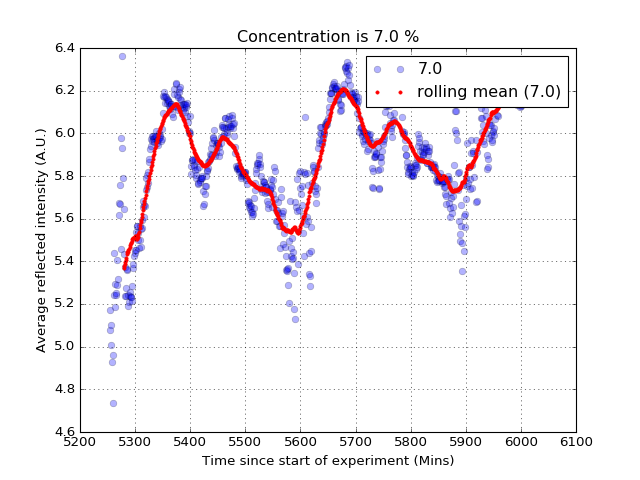

<IPython.core.display.Javascript object>


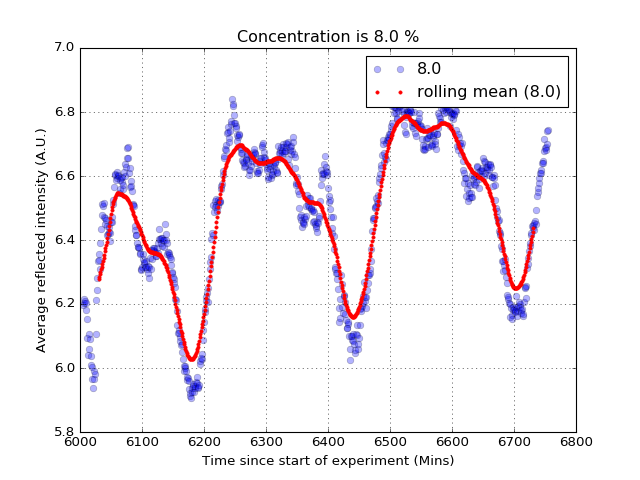

<IPython.core.display.Javascript object>


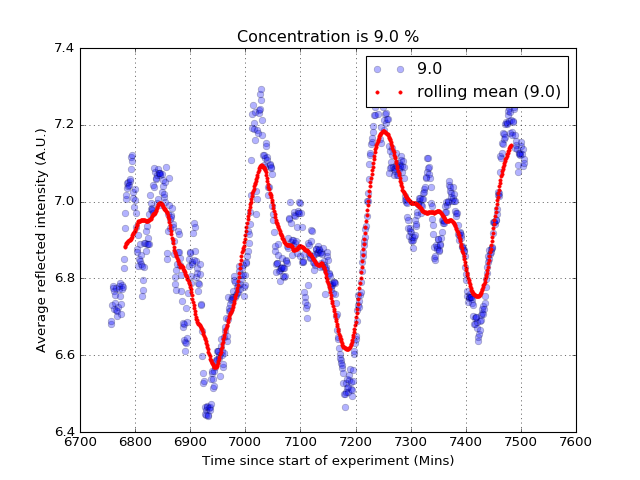

<IPython.core.display.Javascript object>


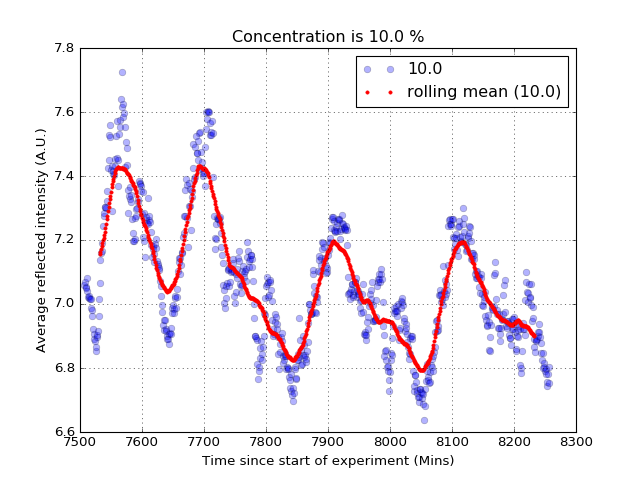

<IPython.core.display.Javascript object>


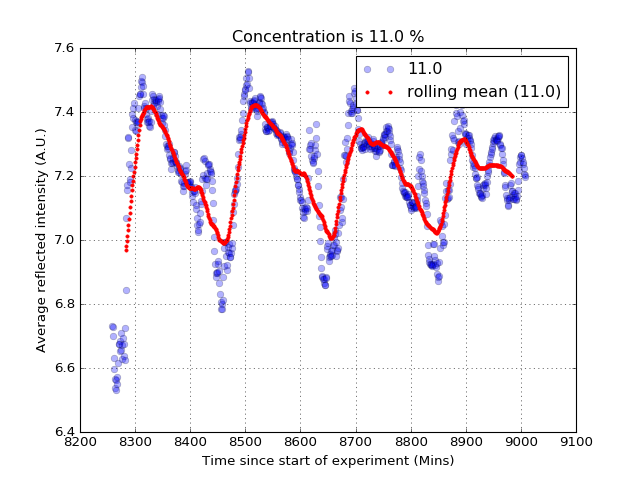

<IPython.core.display.Javascript object>


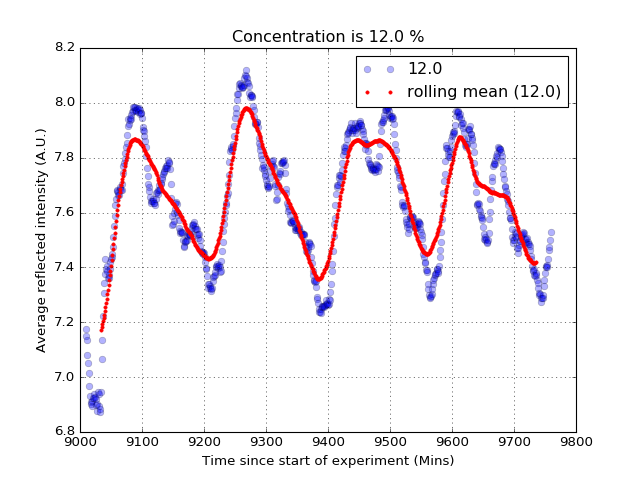

<IPython.core.display.Javascript object>


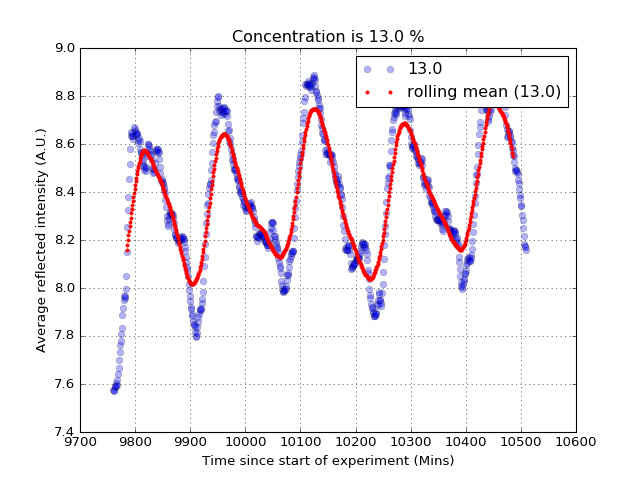

<IPython.core.display.Javascript object>


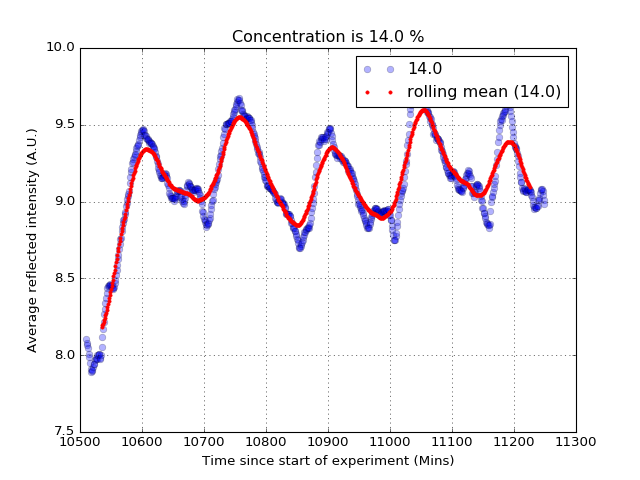

<IPython.core.display.Javascript object>


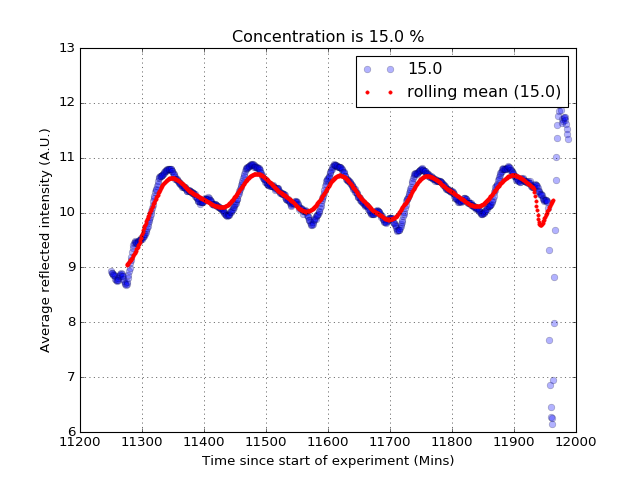

<IPython.core.display.Javascript object>


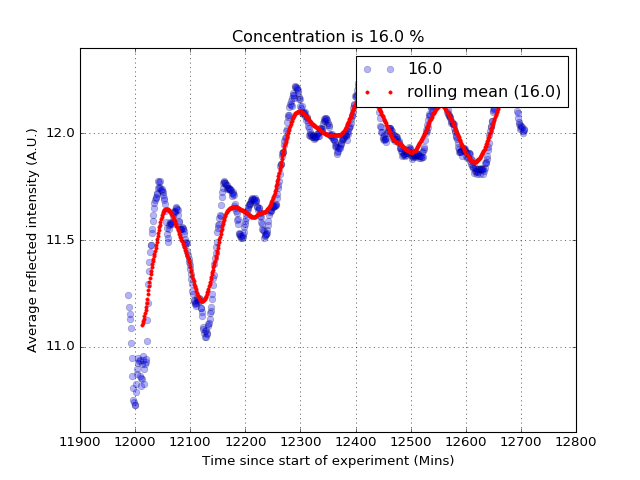

<IPython.core.display.Javascript object>


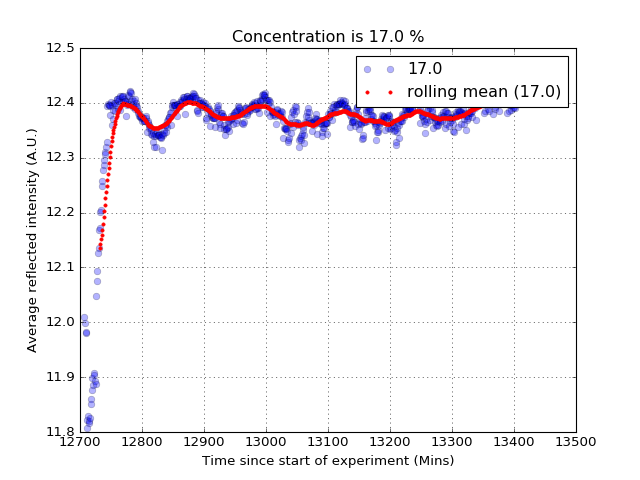

<IPython.core.display.Javascript object>


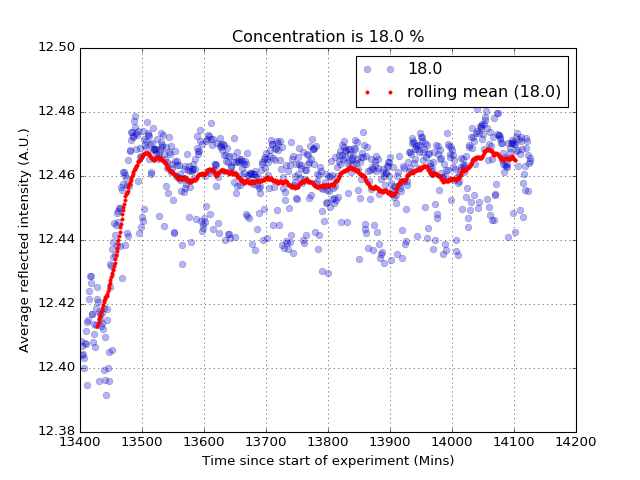

C:\Users\Tarun\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


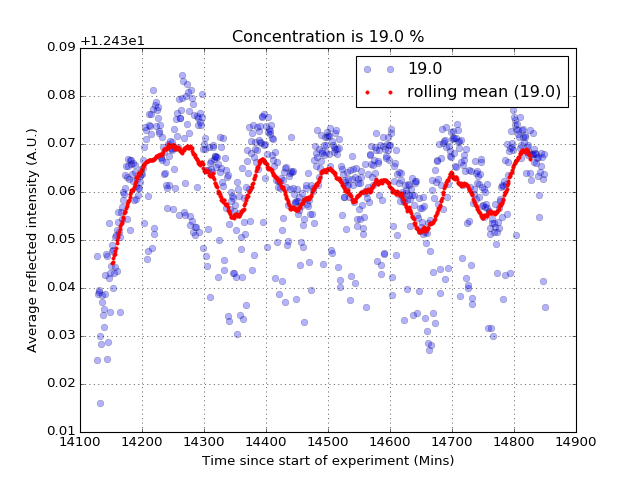

<IPython.core.display.Javascript object>


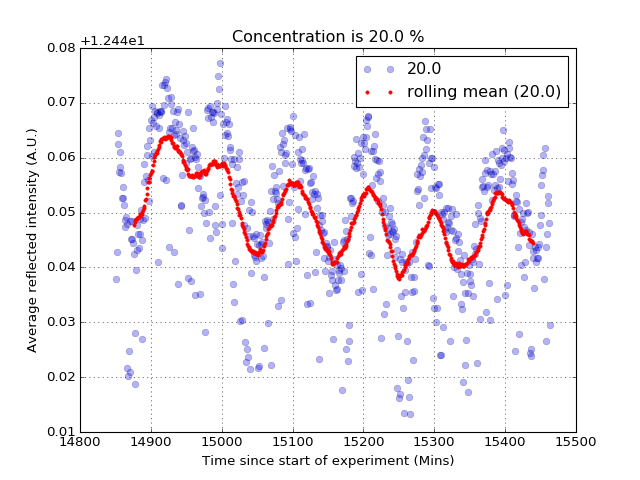

In [53]:
# Individual plots
for key, group in grouped:
    plt.figure()
    plt.plot(group['mean'], 'o', alpha=0.3, label=key)
    rolling = group['mean'].rolling(window=50, center=True).mean()
    plt.plot(rolling, '.', lw=3, color='red', label='rolling mean ({k})'.format(k=key)) 
    plt.title('Concentration is {} %'.format(key))
    plt.grid()
    plt.xlabel('Time since start of experiment (Mins)')
    plt.ylabel('Average reflected intensity (A.U.)')
    plt.legend()
#     plt.savefig('../Data/Plots/' + str(key) + '.png', dpi=200)
#     pass

<IPython.core.display.Javascript object>


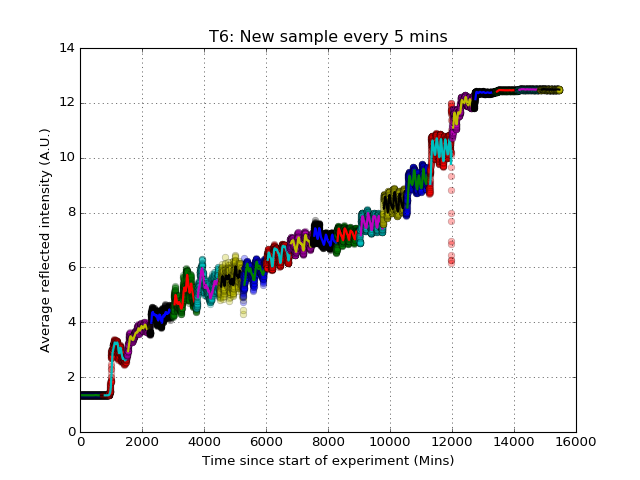

In [52]:
#All in one
fig, ax = plt.subplots()

for key, group in grouped:
    ax.plot(group['delta'], group['mean'], 'o', alpha=0.3, label=key)
    rolling = group['mean'].rolling(window=50).mean()
    ax.plot(group['delta'], rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.xticks(np.arange(0, max(group['delta'])+flush_time, flush_time))
# fig.autofmt_xdate()  # Rotate slightly

# plt.legend(loc='best', ncol=3, fontsize='small')\
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Average reflected intensity (A.U.)')
plt.title('T6: New sample every {:d} mins'.format(flush_time))
# plt.savefig('../Data/Plots/' + 'lifetimeVsTime.png', dpi=500)

<IPython.core.display.Javascript object>


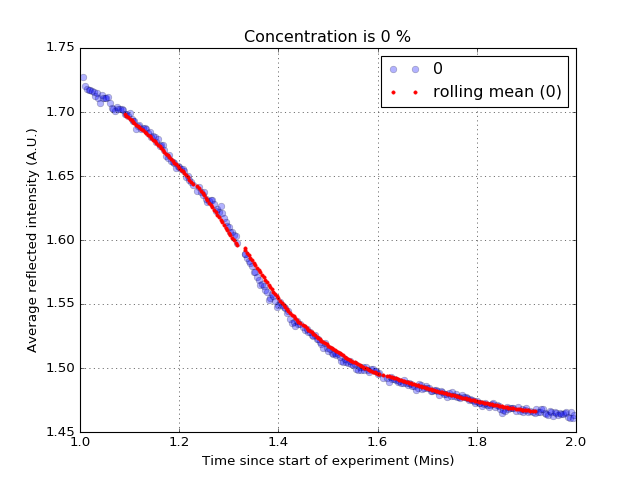

<IPython.core.display.Javascript object>


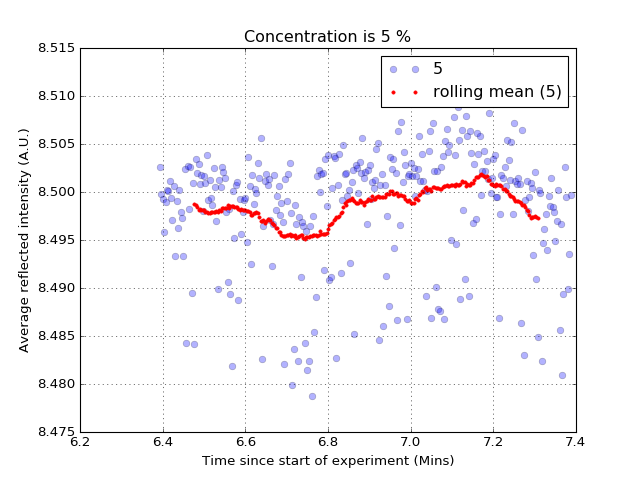

<IPython.core.display.Javascript object>


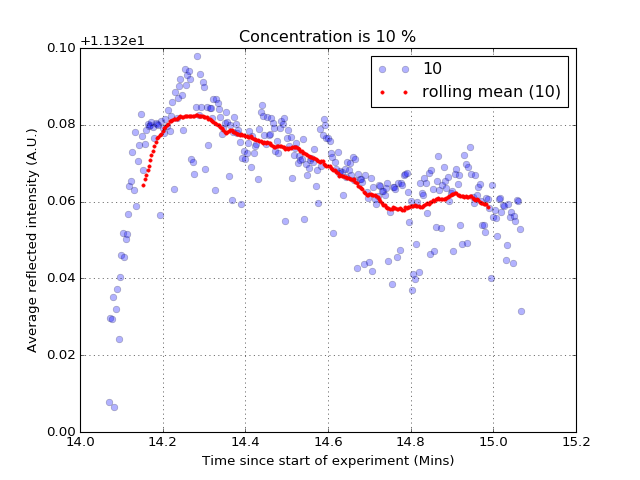

<IPython.core.display.Javascript object>


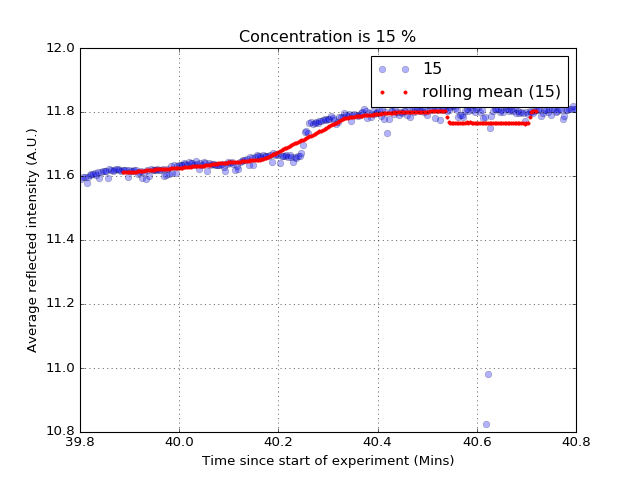

In [14]:
# Individual plots
for key, group in grouped:
    plt.figure()
    plt.plot(group['delta'], group['mean'], 'o', alpha=0.3, label=key)
    rolling = group['mean'].rolling(window=50, center=True).mean()
    plt.plot(group['delta'], rolling, '.', lw=3, color='red', label='rolling mean ({k})'.format(k=key)) 
    plt.title('Concentration is {} %'.format(key))
    plt.grid()
    plt.xlabel('Time since start of experiment (Mins)')
    plt.ylabel('Average reflected intensity (A.U.)')
    plt.legend()
#     plt.savefig('../Data/Plots/' + str(key) + '.png', dpi=200)
#     pass

In [78]:
# Apply mean and std functions to all collumns
g = grouped.agg([np.mean, np.std])

<IPython.core.display.Javascript object>


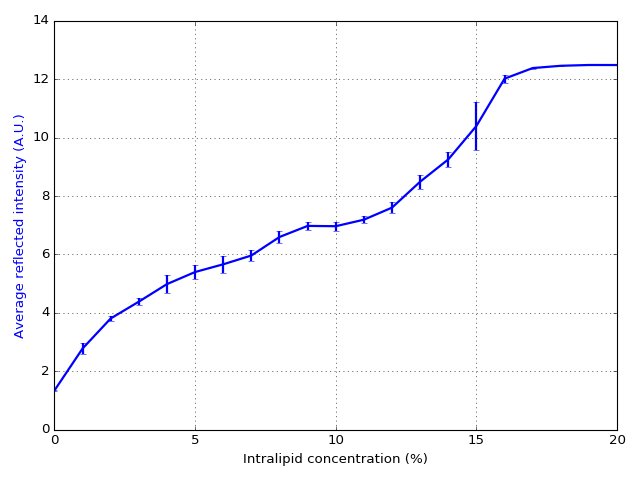

In [79]:
g = g.reset_index()

fig, ax = plt.subplots()

ax.errorbar(g['concentration'], g['mean']['mean'], yerr=g['mean']['std'], color='b', lw='2')

ax.set_xlabel('Intralipid concentration (%)')
ax.set_ylabel('Average reflected intensity (A.U.)', color='b')

ax.grid()
plt.tight_layout()
ax.ticklabel_format(useOffset=False, axis='y')

plt.tight_layout()
# plt.title(df['chip'][0])
# plt.savefig("../Data/Plots/IL_reflection" + '.png', dpi=600)